<img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width="500">
<h1 align="center"><font size="7"><strong>Final Project 3 </strong></font></h1>
<h1 align="center"><font size="7"><strong>(ENSEMBLE - RANDOM FOREST & BOOSTING)</strong></font></h1>


------------------------------------------------
### __Kelompok 2 - PYTN KS 019 - Dyah Ayu Kusuma Wardhani__

# __A. INTODUCTION__
-----
## 1. Latar Belakang
Cardiovascular diseases (CVDs) adalah penyebab kematian nomor 1 secara global yang merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu. Pada project ini, kami ingin melakukan prediksi pada kematian pasien gagal jantung dengan menggunakan konsep classification dan model ensemble.

Kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. **DEATH_EVENT** adalah variabel target untuk diprediksi, apakah pasien sudah meninggal saat waktu follow-up dengan pilihan 1 : Yes dan 0 : No. 


## 2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


## 3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi keselamatan pasien dari penyakit jantung
- Untuk membuat model ensemble yang dianggap paling sesuai dengan konsep classification sehingga diperoleh akurasi yang tinggi
- Untuk memprediksi keselamatan pasien dari penyakit jantung berdasarkan faktor-faktor yang mempengaruhinya menggunakan model ensemble

# __B. IMPORT LIBRARY__
----

In [1]:
# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# Import library untuk preprocessing 
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Import library untuk balancing data
from imblearn.over_sampling import SMOTE



# __C. DATA LOADING__
----

## 1. Memanggil Dataset

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

#melihat data bagian atas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Keterangan dataset:**

Dataset ini berisi 13 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `age` = umur pasien (antara 40 - 95)
2. `anaemia` = terdapat pengurangan haemoglobin (Yes : 1, No : 0)
3. `creatinine_phosphokinase` = level enzim CPK dalam mcg/L
4. `diabetes` = pasien memiliki riwayat diabetes (Yes : 1, No : 0)
5. `ejection_fraction` = persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. `high_blood_pressure` = pasien punya darah tinggi (Yes : 1, No : 0)
7. `platelets` = jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` = level serum creatinine di darah dalam mg/dL
9. `serum_sodium` = level serum sodium di darah dalam mEq/L
10. `sex` = jenis kelamin pasien (Male : 1, Female : 0)
11. `smoking` = pasien merokok (Yes : 1, No : 0)
12. `time` = waktu dalam hari untuk follow-up
13. `DEATH_EVENT` = apakah pasien sudah meninggal saat waktu follow-up (Yes:1, No:0)

In [3]:
#Melihat data bagian bawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## 2. Melihat Banyak Baris dan Kolom

In [4]:
df.shape

(299, 13)

## 3. Melihat Index Colums

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## 4. Melihat Total Unique Value

In [6]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

## 5. Melihat Info Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pada dataset ini terdapat 299 baris, 13 kolom dengan tipe data yang bervariasi yakni float dan integer.

## 6. Melihat Deskripsi Data

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# __D. DATA CLEANING__
----

## 1. Pengecekan Missing Value

In [9]:
#Mengecek apakah terdapat missing value
df.isnull().values.any()

False

Dataset ini tidak memiliki missing value

## 2. Pengecekan Duplicate Data

In [10]:
#Mengecek duplicate data
df.duplicated().sum()

0

Setelah dicek, pada dataset tidak terdapat duplicate data

## 3. Mengganti Tipe Data

In [11]:
df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Mengganti tipe data int64 pada atribut age, karena ingin mendapatkan bilangan bulat pada nilai dari atribut age.

## 4. Outliers

### - Melihat outlier pada data

In [12]:
# Mencari tahu data yang memiliki outliers dengan mendefinisikan fungsi
continous_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 
                      'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time','DEATH_EVENT'] 

#Mendeteksi outlier pada setiap atribut
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]

        # Calculate Q1, Q3, and Interquartile Range (IQR)
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 

        #Mengidentify outliers
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  

        print('Kolom {}, : {}'.format(each_feature, len(outliers)))

In [13]:
# Melihat banyak outlier pada setiap kolom
outliers(df[continous_features])

Kolom age, : 0
Kolom anaemia, : 0
Kolom creatinine_phosphokinase, : 29
Kolom diabetes, : 0
Kolom ejection_fraction, : 2
Kolom high_blood_pressure, : 0
Kolom platelets, : 21
Kolom serum_creatinine, : 29
Kolom serum_sodium, : 4
Kolom sex, : 0
Kolom smoking, : 0
Kolom time, : 0
Kolom DEATH_EVENT, : 0


**Keterangan :**
<br> Outlier yang akan dihapus hanya pada kolom "ejection_franction" dan "serum_sodium" saja. Karena pada kolom "creatinine_phosphokinase", "platelets", dan "serum_creatinine" memiliki rentang nilai yang masih memungkinkan (titik data aktual yang dapat membantu memprediksi "DEARH_EVENT") sehingga dianggap bukan outlier.

### - Mengatasi Outlier

In [14]:
#Memilih kolom yang akan dihapus ouliernya
outs = df.loc[:,['ejection_fraction', 'serum_sodium']]

In [15]:
print('Data sebelum di hilangkan outliernya :', df.shape)

for feature in outs:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    #Menentukan batas bawah dan atas untuk mengidentifikasi outlier
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    # Menghapus baris yang nilainya keluar dari batas atas dan bawah
    df = df[~((df[feature] < lower_limit) | (df[feature] > upper_limit))]

print('Data sesudah dihilangkan outliernya :', df.shape)    


Data sebelum di hilangkan outliernya : (299, 13)
Data sesudah dihilangkan outliernya : (293, 13)


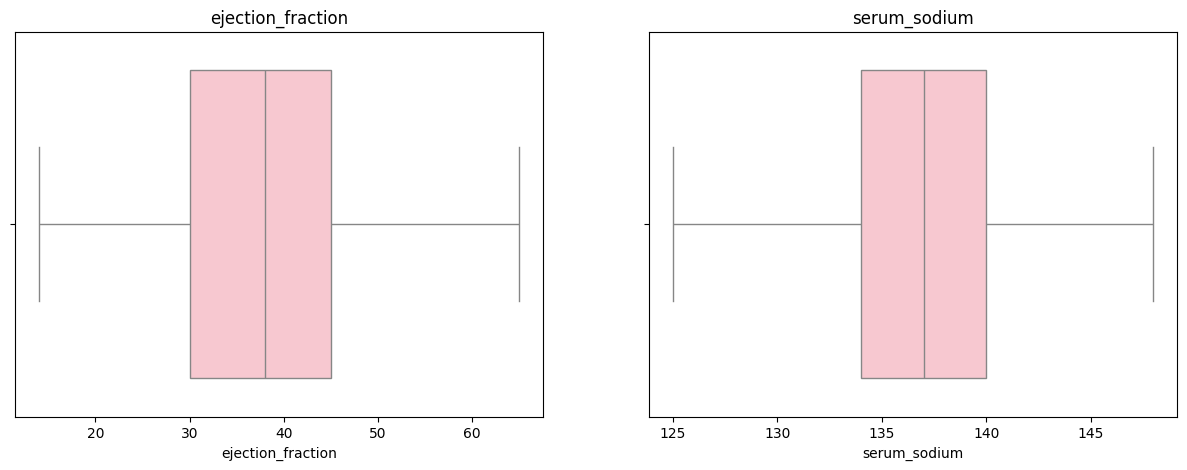

In [16]:
plt.figure(figsize=(15,5))

for i, col in enumerate(outs):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(hspace =.3, wspace=.2)
    plt.title(col)
    sns.boxplot(x = df[col], color = 'pink')

**Keterangan :**
<br> Pada kolom 'ejection_fraction' dan 'serum_sodium' sudah tidak terdapat outlier.

## 5. Fitur Numerical dan Categorical

### - Membagi kolom Categorical dan Numerik

In [17]:
fitur_df = df.copy()

In [18]:
#Memisahkan atribut mana saja yang termasuk categorical
categorical = ['anaemia','diabetes','high_blood_pressure','sex','smoking', 'DEATH_EVENT']
print('Categorical features :\n', categorical)

Categorical features :
 ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


In [19]:
#Memisahkan atribut mana saja yang termasuk numerik
numerik = [value for value in list(fitur_df.columns) if value not in categorical and value != 'DEATH_EVENT']
print('\nNumerical features :\n', numerik)


Numerical features :
 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


### - Melakukan Encode pada kolom Categorical

In [20]:
#Mengganti nilai 0 dan 1 menjadi 'No' dan 'Yes'pada kolom categorical 
swapper = {0: 'No', 1: 'Yes'}
for col in categorical:
    if col != 'sex':
        fitur_df[col] = fitur_df[col].map(swapper)

In [21]:
#Mengganti nilai 0 dan 1 menjadi 'Female' dan 'Male' pada kolom sex
for i in range(len(fitur_df)):
    if fitur_df.iloc[i, fitur_df.columns.get_loc('sex')] == 0:
        fitur_df.iloc[i, fitur_df.columns.get_loc('sex')] = 'Female'
    else:
        fitur_df.iloc[i, fitur_df.columns.get_loc('sex')] = 'Male'


In [22]:
fitur_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
5,90.0,Yes,47,No,40,Yes,204000.00,2.1,132,Male,Yes,8,Yes


**Keterangan :**
<br>Setelah dilakukan data cleaning maka dapat diketahui bahwa dataset tidak memiliki missing value dan duplicate dat.  Tipe data pada kolom age yang awalnya float sudah diubah menjadi int. Dataset memiliki 7 fitur numerik dan 6 fitur kategorikal yang sudah di encode sehingga lebih mudah untuk dilakukan proses selanjutnya. Tampaknya juga tidak ada nilai numerik dengan angka nol yang tidak disengaja.

# __E. EXPLORATORY DATA ANALYSIS (EDA)__
----

## 1. Descriptive Statistics

In [23]:
fitur_df[categorical].describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,293,293,293,293,293,293
unique,2,2,2,2,2,2
top,No,No,No,Male,No,No
freq,167,172,190,193,198,201


Diperoleh bahwa:
- Pasien yang tidak mengidap anemia yaitu 167 pasien
- Pasien yang tidak mengidap diabetes yaitu 172 pasien
- Pasien dengan tidak mengidap tekanan darah tinggi yaitu 190 pasien
- Pasien yang tidak merokok yakni 198 pasien
- Pasien yang tidak meninggal berjumlah 201 orang

In [24]:
fitur_df[numerik].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,60.994314,583.071672,37.918089,264100.118396,1.358669,136.870307,130.989761
std,11.915112,978.860778,11.390941,97968.627071,0.940044,3.880524,77.501325
min,40.000000,23.000000,14.000000,25100.000000,0.500000,125.000000,4.000000
25%,51.000000,115.000000,30.000000,213000.000000,0.900000,134.000000,74.000000
50%,60.000000,249.000000,38.000000,262000.000000,1.100000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,304000.000000,1.400000,140.000000,205.000000
max,95.000000,7861.000000,65.000000,850000.000000,9.400000,148.000000,285.000000


Diperoleh bahwa:
- Usia rata-rata pasien yakni berkisar 60 tahun
- Rata-rata nilai kreatinin fosfokinase pada pasien yaitu 583.07
- Fraksi ejeksi maksimal yang ada pada pasien yaitu 65
- Kreatinin serum minimal yang ada pada pasien yaitu 0,5
- Sodium serum rata-rata pada pasien yaitu 136,87

## 2. Visualisasi & Analisis

### - Presentasi Pasien yang meninggal dan tidak berdasarkan Gender

In [25]:

male = fitur_df[fitur_df["sex"]== 'Male']
female = fitur_df[fitur_df["sex"]== 'Female']

male_survived = male[fitur_df["DEATH_EVENT"]== 'No']
male_not = male[fitur_df["DEATH_EVENT"]== 'Yes']
female_survived = female[fitur_df["DEATH_EVENT"]== 'No']
female_not = female[fitur_df["DEATH_EVENT"]=='Yes']

import plotly.graph_objects as go

# Data
male_survived_count = len(male_survived)
male_not_count = len(male_not)
female_survived_count = len(female_survived)
female_not_count = len(female_not)

# Labels dan values untuk diagram pie
labels = ['Male - Survived', 'Male - Not Survived', 'Female - Survived', 'Female - Not Survived']
values = [male_survived_count, male_not_count, female_survived_count, female_not_count]

# Colors
colors = ['skyblue','gold','pink','darkgrey']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4, marker=dict(colors=colors))])

# Update layout
fig.update_layout(title_text="Survival Analysis by Gender", showlegend=True)

# Show the figure
fig.show()

**Kesimpulan:** <br>
Berdasarkan visualisasi, dapat dilihat bahwa:
- Pasien dengan jenis kelamin laki-laki yang mampu bertahan hidup memiliki persentase paling tinggi dengan nilai 44.7% dan berjumlah 131 data
- Pasien dengan jenis kelamin perempuan yang mampu bertahan hidup memiliki persentase 23.9% dan berjumlah 70 data
- Pasien dengan jenis kelamin laki-laki yang tidak mampu bertahan hidup memiliki persentase 21.2% dan berjumlah 62 data
- Pasien dengan jenis kelamin perempuan yang tidak mampu bertahan hidup memiliki persentase paling rendah dengan nilai 10.2% dan berjumlah 30 data

### - Presentase pasien yang memiliki riwayat penyakit dan gender pasien

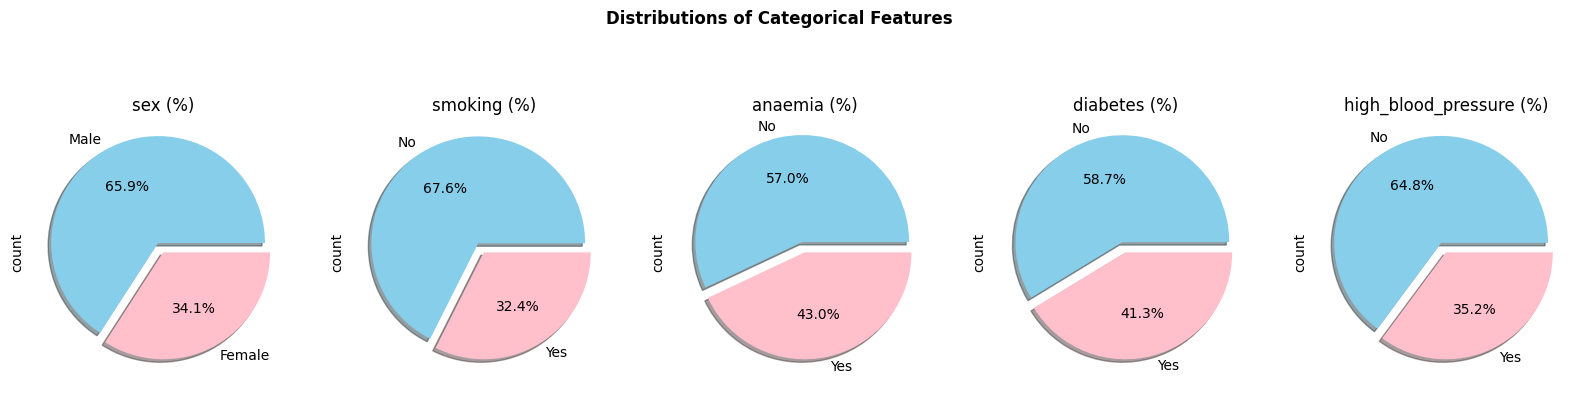

In [26]:
import matplotlib.pyplot as plt

# Set up subplots
figure, axes = plt.subplots(1, 5, figsize=(20, 5))
figure.suptitle('Distributions of Categorical Features\n', fontweight='bold')

categorical = ["sex", "smoking", "anaemia", "diabetes", "high_blood_pressure"]

for i in range(len(categorical)):
    column = categorical[i]
    
    graph = fitur_df[column].value_counts().plot.pie(autopct='%1.1f%%', 
                                                    ax=axes[i],
                                                    colors=['skyblue', 'pink'], 
                                                    fontsize=10,
                                                    shadow=True,
                                                    explode=[0.1, 0])
   
    axes[i].set_title(column + ' (%)', fontsize=12)

plt.show()


In [27]:
for i, column in enumerate(categorical):
    value_counts = fitur_df[column].value_counts()
    print(f"Counts for unique values in '{column}':")
    print(value_counts)
    print("="*30)

Counts for unique values in 'sex':
sex
Male      193
Female    100
Name: count, dtype: int64
Counts for unique values in 'smoking':
smoking
No     198
Yes     95
Name: count, dtype: int64
Counts for unique values in 'anaemia':
anaemia
No     167
Yes    126
Name: count, dtype: int64
Counts for unique values in 'diabetes':
diabetes
No     172
Yes    121
Name: count, dtype: int64
Counts for unique values in 'high_blood_pressure':
high_blood_pressure
No     190
Yes    103
Name: count, dtype: int64


**Kesimpulan:**<br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- Pasien gagal jantung yang berjenis kelamin laki-laki yaitu 65.9% dan berjumlah 193, sedangkan yang berjenis kelamin perempuan yaitu 34.1% dan berjumlah 100
- Pasien gagal jantung yang merokok yaitu 32.4% dan berjumlah 95, sedangkan yang tidak merokok yaitu 67.6% dan berjumlah 198
- Pasien gagal jantung yang juga menderita anaemia yaitu 43% dan berjumlah 126, sedangkan yang tidak menderita anaemia yaitu 57% dan berjumlah 167
- Pasien gagal jantung yang juga menderita diabetes yaitu 41.3% dan berjumlah 121, sedangkan yang tidak menderita diabetes yaitu 58.7% dan berjumlah 172 
- Pasien gagal jantung yang memiliki darah tinggi yaitu 35.2% dan berjumlah 103, sedangkan yang tidak memiliki darah tinggi yaitu 64.8% dan berjumlah 190
- Pasien gagal jantung yang meninggal yaitu 32.1% dan berjumlah 96, sedangkan yang tidak meninggal yaitu 68.6% dan berjumlah 201

### - Hubungan Penyakit yang diderita pasien dengan kasus kematian

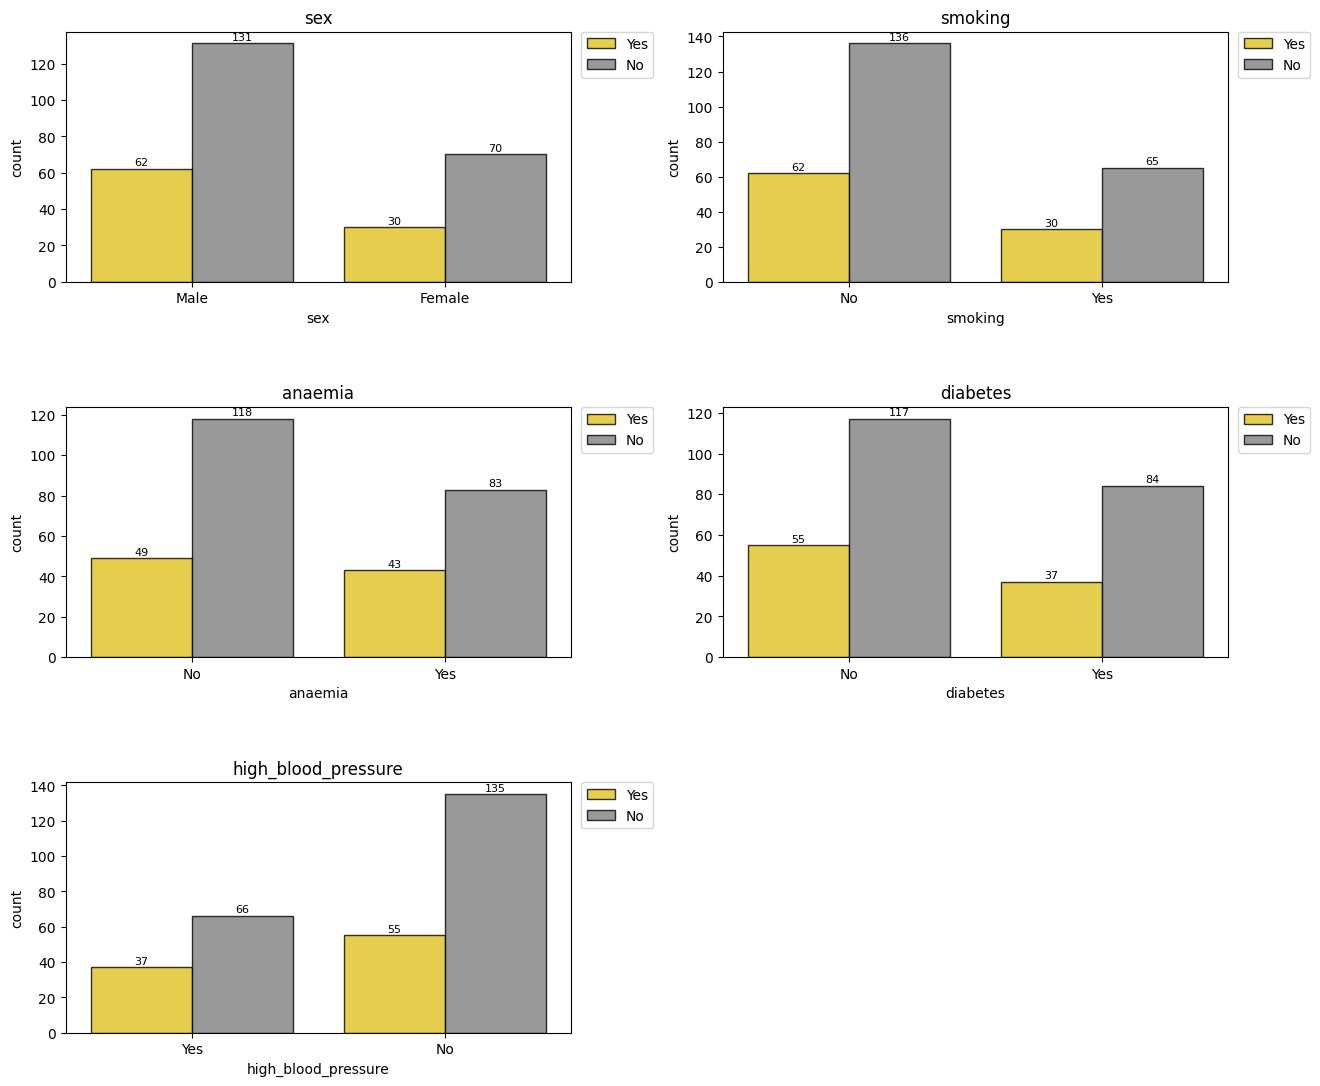

In [28]:
plt.figure(figsize=(15, 13))

categorical = ["sex", "smoking", "anaemia", "diabetes", "high_blood_pressure"]

for i, col in enumerate(categorical):
    plt.subplot(3, 2, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    bar = sns.countplot(data= fitur_df, x=col, hue="DEATH_EVENT", 
                        palette = ["gold", "grey"], 
                        alpha=0.8, edgecolor="k", linewidth=1)
    
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
    for a in bar.containers:
        bar.bar_label(a, fmt='%.0f', label_type='edge', padding=1, fontsize=8)

**Kesimpulan:**<br> 
Berdasarkan visualisasi diatas, maka dapat diketahui bahwa:
- Pasien berjenis kelamin laki-laki lebih banyak tingkat kematiannya. Kasus kematian pada pasien dengan jenis kelamin laki-laki yaitu 62 kasus, sedangkan pada pasien dengan jenis kelamin perempuan yaitu 30 kasus
- Kasus kematian pada pasien yang merokok yaitu 30 kasus, sedangkan pada pasien yang tidak merokok yaitu 62 kasus. Artinya perokok belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Kasus kematian pada pasien yang menderita anaemia yaitu 43 kasus, sedangkan pada pasien yang tidak menderita anaemia yaitu 49 kasus. Artinya penderita anaemia belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Kasus kematian pada pasien yang menderita diabetes yaitu 37 kasus, sedangkan pada pasien yang tidak menderita diabetes yaitu 55 kasus. Artinya penderita diabetes belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Kasus kematian pada pasien yang menderita darah tinggi yaitu 37 kasus, sedangkan pada pasien yang tidak menderita darah tinggi yaitu 55 kasus. Artinya penderita darah tinggi belum tentu menjadi penyebab kematian pada pasien gagal jantung



### - Distribusi Fitur Numerik

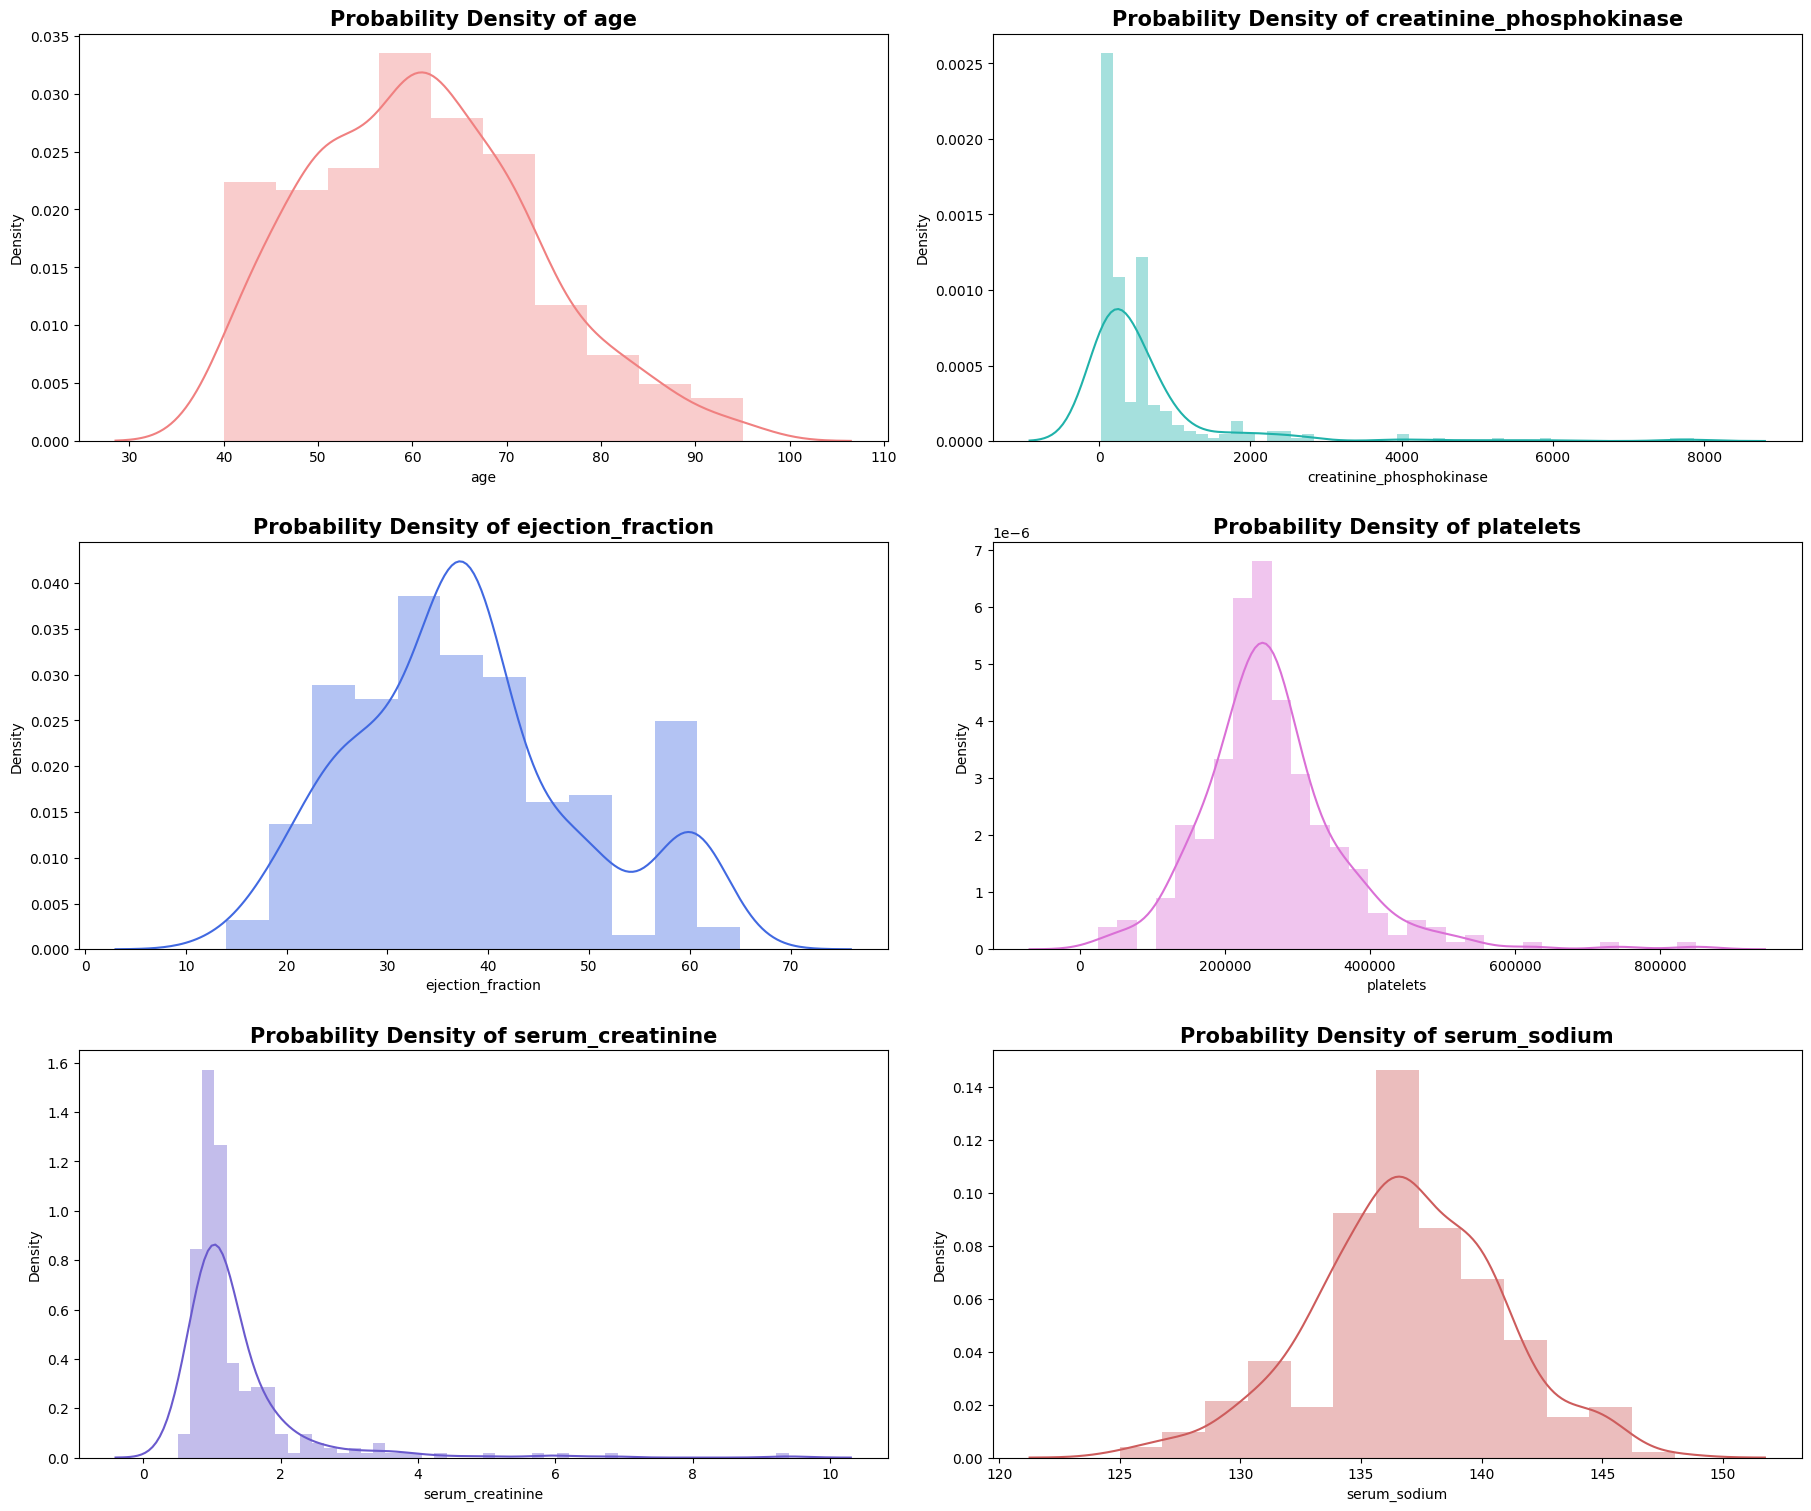

In [29]:
fig, ax = plt.subplots(3,2, figsize=(18,15), constrained_layout=True)

# age
sns.distplot(fitur_df['age'], ax=ax[0,0], color= 'lightcoral')
ax[0,0].set_title("Probability Density of age", fontsize=15, fontweight='bold')

# creatinine_phosphokinase
sns.distplot(fitur_df['creatinine_phosphokinase'], ax=ax[0,1], color= 'lightseagreen')
ax[0,1].set_title("Probability Density of creatinine_phosphokinase", fontsize=15, fontweight='bold')

# ejection_fraction
sns.distplot(fitur_df['ejection_fraction'], ax=ax[1,0], color='royalblue')
ax[1,0].set_title("\nProbability Density of ejection_fraction", fontsize=15, fontweight='bold')

# platelets
sns.distplot(fitur_df['platelets'], ax=ax[1,1], color='orchid')
ax[1,1].set_title("\nProbability Density of platelets", fontsize=15, fontweight='bold')

# serum_creatinine
sns.distplot(fitur_df['serum_creatinine'], ax=ax[2,0], color='slateblue')
ax[2,0].set_title("\nProbability Density of serum_creatinine", fontsize=15, fontweight='bold')

# serum_sodium
sns.distplot(fitur_df['serum_sodium'], ax=ax[2,1], color='indianred')
ax[2,1].set_title("\nProbability Density of serum_sodium", fontsize=15, fontweight='bold');

**Kesimpulan:** <br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- `age` : tidak berdistribusi normal karena terdapat banyak puncak dalam grafik distribusi variabel 'age' dan sebagian besar terdistribusi sebagai nilai antara 60-65, 65-70, dan 70-75
- `creatinine_phosphokinase` : tidak berdistribusi normal karena data condong ke kiri (positively skewed)
- `ejection_fraction` : tidak berdistribusi normal karena data condong ke kiri (positively skewed) dan terdapat data yang kosong antara nilai 40-45
- `platelets` : berdistribusi normal karena grafik tidak memiliki banyak puncak, kemiringan dan kurtosis rendah serta sebagian besar terdistribusi antara 200000 dan 400000
- `serum_creatinine` : tidak berdistribusi normal karena data condong ke kiri (positively skewed)
- `serum_sodium` : tidak berdistribusi normal karena data condong ke kanan (negatively skewed)

# __F. DATA PREPROCESSING__
----

## 1. Correlation Matrix

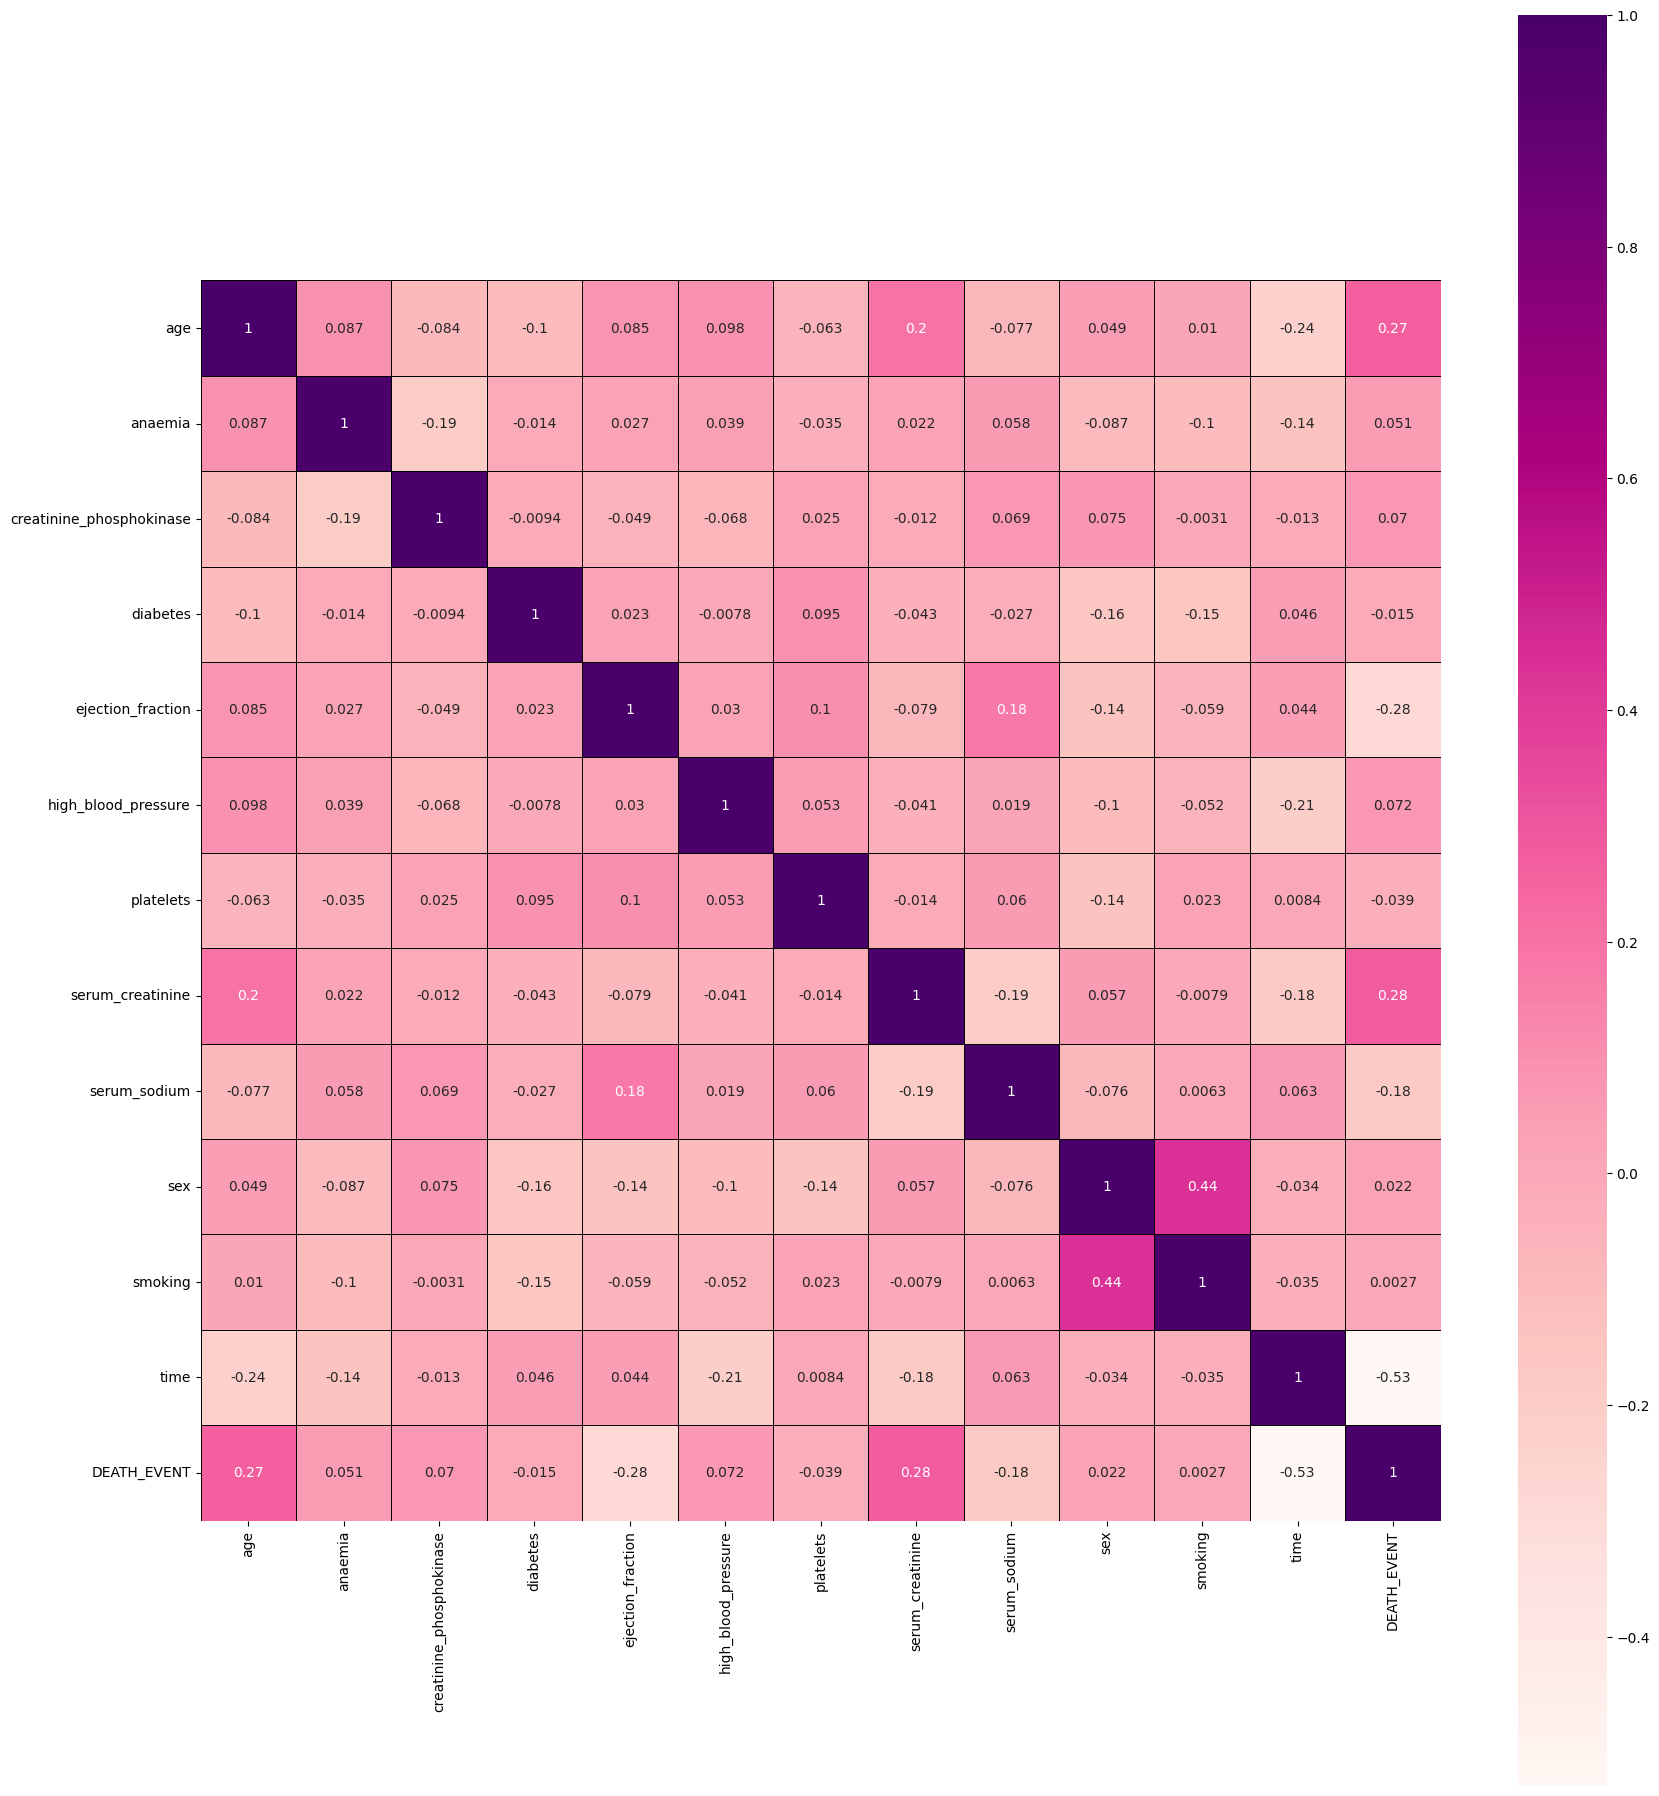

In [30]:
plt.figure(figsize=(20,23)) 
    
# Membuat heatmap dengan menampilkan nilai dari korelasi
sns.heatmap(df.corr(), 
            annot=True, 
            cmap="RdPu", 
            linewidths=.5, 
            linecolor='black', 
            square=True); 

In [31]:
df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False)

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.278516
age,0.269667
high_blood_pressure,0.071754
creatinine_phosphokinase,0.070433
anaemia,0.051050
sex,0.021703
smoking,0.002681
diabetes,-0.014834
platelets,-0.039147


**Keterangan:** <br>
Berdasarkan visualisasi heatmap diatas, dipilih beberapa kolom yang memiliki korelasi cukup tinggi dengan kolom `DEATH_EVENT` yang kemudian nantinya digunakan untuk variabel X pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `serum_creatinine`, dengan korelasi sebesar 0.28
2. `age`, dengan korelasi sebesar 0.27
3. `high_blood_pressure`, dengan korelasi sebesar 0.071
4. `anaemia`, dengan korelasi sebesar 0.05
5. `creatinine_phosphokinase`, dengan korelasi sebesar 0.07
6. `ejection_fraction`, dengan korelasi sebesar -0.28
7. `serum_sodium`, dengan korelasi sebesar -0.18
8. `platelets`, dengan korelasi sebesar -0.39

## 2. Mengahapus Kolom Time

In [32]:
df.drop(['time'], axis = 1, inplace= True)
df.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,1


## 3. Feature Selection

In [33]:
#Melakukan inisiasi variabel X dan Y

X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
print(X.shape)
print(y.shape)

(293, 11)
(293,)


Melakukan feature selection menggunakan library *ExtraTreesRegressor* yang mengambil 8 atribut paling penting

In [34]:
ET = ExtraTreesClassifier()
ET.fit(X,y)

ExtraTreesClassifier()

In [35]:
ET.feature_importances_

array([0.14521248, 0.02956902, 0.10353042, 0.04474832, 0.18082545,
       0.03204472, 0.10485634, 0.16461933, 0.1214345 , 0.03256522,
       0.04059421])

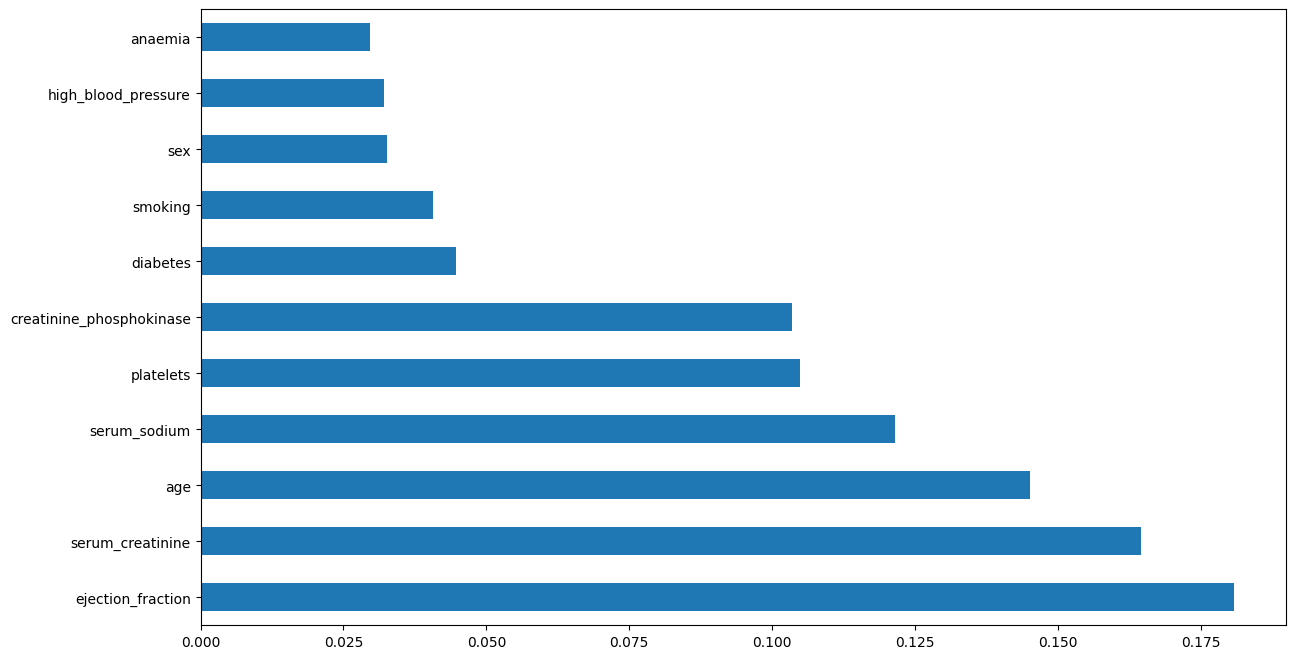

In [36]:
plt.figure(figsize=(14,8))
feat_importances=pd.Series(ET.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final yang akan dijadikan training.

Dalam hal ini dipilih 8 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan, yakni atribut 'ejection_fraction','serum_creatinine','age','serum_sodium','creatinine_phosphokinase','platelets'

In [37]:
#Memilih fitur yang akan di train
df_fix = df[['ejection_fraction','serum_creatinine','age','serum_sodium','creatinine_phosphokinase','platelets','DEATH_EVENT']]
df_fix.head()

,ejection_fraction,serum_creatinine,age,serum_sodium,creatinine_phosphokinase,platelets,DEATH_EVENT
0,20,1.9,75.0,130,582,265000.00,1
1,38,1.1,55.0,136,7861,263358.03,1
2,20,1.3,65.0,129,146,162000.00,1
3,20,1.9,50.0,137,111,210000.00,1
5,40,2.1,90.0,132,47,204000.00,1


In [38]:
# Melihat rincian dataframe df_fix
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ejection_fraction         293 non-null    int64  
 1   serum_creatinine          293 non-null    float64
 2   age                       293 non-null    float64
 3   serum_sodium              293 non-null    int64  
 4   creatinine_phosphokinase  293 non-null    int64  
 5   platelets                 293 non-null    float64
 6   DEATH_EVENT               293 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 26.4 KB


Memiliki tipe data numeric

In [39]:
# Melihat dimensi df_fix
df_fix.shape

(293, 7)

**Keterangan**<br>
- Fitur yang dipilih : 'ejection_fraction','serum_creatinine','age','serum_sodium','creatinine_phosphokinase','platelets'
- Melihat rincian datafram df_fix, yakni memiliki tipe data numerik
- Dimensi df_fix yakni 293 baris dengan 7 kolom

## 4. Feature Scaling

In [40]:
# memisahkan variabel dependen dan independen pada data training dan testing
x = df_fix.drop(['DEATH_EVENT'],axis=1)
y = df_fix['DEATH_EVENT']

In [41]:
x = MinMaxScaler().fit_transform(x)

# __G. MODELLING__
-----

## 1. Model Defining

In [42]:
#Random Forest model
RF_model = RandomForestClassifier(random_state=42)

#Extra Trees model
ET_model = ExtraTreesClassifier(random_state=42)

#Decision Trees
DC_model = DecisionTreeClassifier(random_state=42)

#K-Neighbors
KNN_model = KNeighborsClassifier(5)

#Naive Bayes (Gaussian)
NB_model = GaussianNB()

#Gradient Boosting
GB_model = GradientBoostingClassifier(random_state=42)

#Support Vector Machine
svm_model = svm.SVC(kernel='linear')

#Logistic Regression
lr_model = LogisticRegression(random_state=42)

## 2. Training Modell

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (205, 6)
x_test shape : (88, 6)
y_train shape : (205,)
y_test shape : (88,)


## 3. Evaluasi Modelling tanpa SMOTE

In [44]:
#Menyimpan Data Modelling tanpa SMOTE
accuracy_list = []

### a. RandomForestClassifier

In [45]:
RF_model.fit(x_train, y_train)
RF_ypred1 = RF_model.predict(x_test)

RF_model.score(x_test, y_test)
print("Test score:", RF_model.score(x_test, y_test))
print("Train score:", RF_model.score(x_train, y_train))

Test score: 0.75
Train score: 1.0


In [46]:
cm1 = confusion_matrix(y_test, RF_ypred1)
print('Confusion Matrix : \n', cm1)

accuracy_list.append(100*accuracy_score(y_test, RF_ypred1))

print("Akurasi Model : \n", RF_model.score(x_test, y_test))
print(classification_report(y_test, RF_ypred1))

Confusion Matrix : 
 [[52  4]
 [18 14]]
Akurasi Model : 
 0.75
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.78      0.44      0.56        32

    accuracy                           0.75        88
   macro avg       0.76      0.68      0.69        88
weighted avg       0.76      0.75      0.73        88



### b. ExtraTreesClassifier

In [47]:
ET_model.fit(x_train, y_train)
ET_ypred1 = ET_model.predict(x_test)

ET_model.score(x_test, y_test)
print("Test score:", ET_model.score(x_test, y_test))
print("Train score:", ET_model.score(x_train, y_train))

Test score: 0.6818181818181818
Train score: 1.0


In [48]:
cm2 = confusion_matrix(y_test, ET_ypred1)
print('Confusion Matrix : \n',cm2 )

accuracy_list.append(100*accuracy_score(y_test, ET_ypred1))

print("Akurasi Model : \n", ET_model.score(x_test, y_test))
print(classification_report(y_test, ET_ypred1))

Confusion Matrix : 
 [[52  4]
 [24  8]]
Akurasi Model : 
 0.6818181818181818
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        56
           1       0.67      0.25      0.36        32

    accuracy                           0.68        88
   macro avg       0.68      0.59      0.58        88
weighted avg       0.68      0.68      0.63        88



### c. DecisionTreeClassifier	

In [49]:
DC_model.fit(x_train, y_train)
DC_ypred1 = DC_model.predict(x_test)

ET_model.score(x_test, y_test)
print("Test score:", DC_model.score(x_test, y_test))
print("Train score:", DC_model.score(x_train, y_train))

Test score: 0.6022727272727273
Train score: 1.0


In [50]:
cm3 = confusion_matrix(y_test, DC_ypred1)
print('Confusion Matrix : \n', cm3)

accuracy_list.append(100*accuracy_score(y_test, DC_ypred1))

print("Akurasi Model : \n", DC_model.score(x_test, y_test))
print(classification_report(y_test, DC_ypred1))

Confusion Matrix : 
 [[40 16]
 [19 13]]
Akurasi Model : 
 0.6022727272727273
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        56
           1       0.45      0.41      0.43        32

    accuracy                           0.60        88
   macro avg       0.56      0.56      0.56        88
weighted avg       0.59      0.60      0.60        88



### d. K-Nearest Neighbors 

In [51]:
KNN_model.fit(x_train, y_train)
KNN_ypred1 = KNN_model.predict(x_test)

ET_model.score(x_test, y_test)
print("Test score:", KNN_model.score(x_test, y_test))
print("Train score:",KNN_model.score(x_train, y_train))

Test score: 0.7159090909090909
Train score: 0.8


In [52]:
cm4 = confusion_matrix(y_test, KNN_ypred1)
print('Confusion Matrix : \n', cm4)

accuracy_list.append(100*accuracy_score(y_test, KNN_ypred1))

print("Akurasi Model : \n", KNN_model.score(x_test, y_test))
print(classification_report(y_test, KNN_ypred1))

Confusion Matrix : 
 [[54  2]
 [23  9]]
Akurasi Model : 
 0.7159090909090909
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        56
           1       0.82      0.28      0.42        32

    accuracy                           0.72        88
   macro avg       0.76      0.62      0.62        88
weighted avg       0.74      0.72      0.67        88



### e. Naive Bayes (Gaussian)

In [53]:
NB_model.fit(x_train, y_train)
NB_ypred1 = NB_model.predict(x_test)

NB_model.score(x_test, y_test)
print("Test score:", NB_model.score(x_test, y_test))
print("Train score:",NB_model.score(x_train, y_train))

Test score: 0.6477272727272727
Train score: 0.7463414634146341


In [54]:
cm5 = confusion_matrix(y_test, NB_ypred1)
print('Confusion Matrix: \n', cm5)

accuracy_list.append(100*accuracy_score(y_test, NB_ypred1))

print("Akurasi Model : \n", NB_model.score(x_test, y_test))
print(classification_report(y_test, NB_ypred1))

Confusion Matrix: 
 [[51  5]
 [26  6]]
Akurasi Model : 
 0.6477272727272727
              precision    recall  f1-score   support

           0       0.66      0.91      0.77        56
           1       0.55      0.19      0.28        32

    accuracy                           0.65        88
   macro avg       0.60      0.55      0.52        88
weighted avg       0.62      0.65      0.59        88



### f. GradientBoostingClassifier

In [55]:
GB_model.fit(x_train, y_train)
GB_ypred1 = GB_model.predict(x_test)

GB_model.score(x_test, y_test)
print("Test score:", GB_model.score(x_test, y_test))
print("Train score:",GB_model.score(x_train, y_train))

Test score: 0.6931818181818182
Train score: 0.9658536585365853


In [56]:
cm = confusion_matrix(y_test, GB_ypred1)
print('Confusion Matrix: \n', cm)

accuracy_list.append(100*accuracy_score(y_test, GB_ypred1))

print("Akurasi Model : \n", GB_model.score(x_test, y_test))
print(classification_report(y_test, GB_ypred1))

Confusion Matrix: 
 [[52  4]
 [23  9]]
Akurasi Model : 
 0.6931818181818182
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        56
           1       0.69      0.28      0.40        32

    accuracy                           0.69        88
   macro avg       0.69      0.60      0.60        88
weighted avg       0.69      0.69      0.65        88



### g. SVM (Support Vector Machine)

In [57]:
svm_model.fit(x_train, y_train)
svm_ypred1 = svm_model.predict(x_test)

ET_model.score(x_test, y_test)
print("Test score:", svm_model.score(x_test, y_test))
print("Train score:",svm_model.score(x_train, y_train))

Test score: 0.6477272727272727
Train score: 0.7121951219512195


In [58]:
cm6 = confusion_matrix(y_test, svm_ypred1)
print('Confusion Matrix: \n', cm6)

accuracy_list.append(100*accuracy_score(y_test, svm_ypred1))

print("Akurasi Model : \n", svm_model.score(x_test, y_test))
print(classification_report(y_test, svm_ypred1))

Confusion Matrix: 
 [[56  0]
 [31  1]]
Akurasi Model : 
 0.6477272727272727
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        56
           1       1.00      0.03      0.06        32

    accuracy                           0.65        88
   macro avg       0.82      0.52      0.42        88
weighted avg       0.77      0.65      0.52        88



### h. Logistic Regression

In [59]:
lr_model.fit(x_train, y_train)
lr_ypred1 = lr_model.predict(x_test)

ET_model.score(x_test, y_test)
print("Test score:", lr_model.score(x_test, y_test))
print("Train score:",lr_model.score(x_train, y_train))

Test score: 0.6931818181818182
Train score: 0.7560975609756098


In [60]:
cm7 = confusion_matrix(y_test, lr_ypred1)
print('Confusion Matrix: \n', cm7)

accuracy_list.append(100*accuracy_score(y_test, lr_ypred1))

print("Akurasi Model : \n", lr_model.score(x_test, y_test))
print(classification_report(y_test, lr_ypred1))

Confusion Matrix: 
 [[56  0]
 [27  5]]
Akurasi Model : 
 0.6931818181818182
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        56
           1       1.00      0.16      0.27        32

    accuracy                           0.69        88
   macro avg       0.84      0.58      0.54        88
weighted avg       0.79      0.69      0.61        88



**RINGKASAN AKURASI MODELING TANPA SMOTE**

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np

# Assuming you have x_train, y_train, x_test, y_test defined

all_model = [RandomForestClassifier,
             ExtraTreesClassifier,
             DecisionTreeClassifier,
             KNeighborsClassifier,
             GaussianNB,
             GradientBoostingClassifier,
             svm.SVC,
             LogisticRegression]

model_name = ['RandomForestClassifier',
              'ExtraTreesClassifier',
              'DecisionTreeClassifier',
              'KNeighborsClassifier',
              'GaussianNB',
              'GradientBoostingClassifier',
              'SVM',
              'LogisticRegression']
 
hasil_train = []
hasil_test = []

for model_type in all_model:
    if model_type in [RandomForestClassifier, ExtraTreesClassifier, DecisionTreeClassifier, GradientBoostingClassifier, LogisticRegression]:
        model = model_type(random_state=42)
    elif model_type == KNeighborsClassifier:
        model = model_type(5)  # You can specify other parameters as well
    elif model_type == svm.SVC:
        model = model_type(random_state=42, probability=True)
    else:
        model = model_type()
        
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)
    hasil_train.append(model.score(x_train, y_train))
    hasil_test.append(model.score(x_test, y_test))



In [62]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = hasil_train
data_hasil['Accuracy test'] = hasil_test
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])

data_hasil.sort_values(by='Accuracy test',ascending = False)

,model,Accuracy training,Accuracy test,gap
0,RandomForestClassifier,1.000000,0.750000,0.250000
3,KNeighborsClassifier,0.800000,0.715909,0.084091
5,GradientBoostingClassifier,0.965854,0.693182,0.272672
7,LogisticRegression,0.756098,0.693182,0.062916
1,ExtraTreesClassifier,1.000000,0.681818,0.318182
6,SVM,0.804878,0.681818,0.123060
4,GaussianNB,0.746341,0.647727,0.098614
2,DecisionTreeClassifier,1.000000,0.602273,0.397727


## 4. Evaluasi Modeling Menggunakan Metode SMOTE (Synthetic Minority Over-sampling Technique)

In [63]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where

# define dataset
x = df_fix.drop(columns=['DEATH_EVENT'],axis=1).values
y = df_fix['DEATH_EVENT'].values

# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# summarize class distribution
counter = Counter(y)
print('Perbandingan DEATH_EVENT sebelum dilakukan SMOTE:',counter)

#----------------------------------------------------------------------------------------------

# transform the dataset
oversample = SMOTE()
x_resample, y_resample = oversample.fit_resample(x, y)

# Memisahkan data menjadi data training dan data testing
x_train_resample, x_test_resample,y_train_resample, y_test_resample = train_test_split(x_resample, 
                                                                                       y_resample, 
                                                                                       stratify = y_resample, 
                                                                                       test_size=0.3, 
                                                                                       random_state=42)

# summarize the new class distribution
counter = Counter(y_resample)
print('Perbandingan DEATH_EVENT setelah dilakukan SMOTE:', counter)

Perbandingan DEATH_EVENT sebelum dilakukan SMOTE: Counter({0: 201, 1: 92})
Perbandingan DEATH_EVENT setelah dilakukan SMOTE: Counter({1: 201, 0: 201})


In [64]:
#Menyimpan Data Modelling SMOTE
accuracy_list_smote = []

In [65]:
# Melatih model-model
RF_model.fit(x_train_resample, y_train_resample)    #RandomForestClassifier
ET_model.fit(x_train_resample, y_train_resample)    #ExtraTreesClassifier
DC_model.fit(x_train_resample, y_train_resample)    #DecisionTreeClassifier
KNN_model.fit(x_train_resample, y_train_resample)   #KNeighborsClassifier
NB_model.fit(x_train_resample, y_train_resample)    #Naive Bayes (Gaussian)
GB_model.fit(x_train_resample, y_train_resample)    #GradientBoostingClassifier
svm_model.fit(x_train_resample, y_train_resample)   #Support Vector Machine
lr_model.fit(x_train_resample, y_train_resample)    #Logistic Regression

LogisticRegression(random_state=42)

### a. RandomForestClassifier

In [66]:
RF_model.fit(x_train_resample, y_train_resample)
RF_pred2 = RF_model.predict(x_test_resample)

# evaluasi model
cm_1 = confusion_matrix(y_test_resample,RF_pred2)
print('Confusion matrix : \n', cm_1)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, RF_pred2))

print("Akurasi Model : \n", accuracy_score(y_test_resample, RF_pred2))
print(classification_report(y_test_resample,RF_pred2))

Confusion matrix : 
 [[45 16]
 [ 6 54]]
Akurasi Model : 
 0.8181818181818182
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        61
           1       0.77      0.90      0.83        60

    accuracy                           0.82       121
   macro avg       0.83      0.82      0.82       121
weighted avg       0.83      0.82      0.82       121



### b. ExtraTreesClassifier

In [67]:
ET_model.fit(x_train_resample, y_train_resample)
ET_pred2 = ET_model.predict(x_test_resample)

# evaluasi model
cm_2 = confusion_matrix(y_test_resample,ET_pred2)
print('Confusion matrix : \n', cm_2)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, ET_pred2))

print("Akurasi Model : \n", accuracy_score(y_test_resample, ET_pred2))
print(classification_report(y_test_resample, ET_pred2))

Confusion matrix : 
 [[48 13]
 [ 4 56]]
Akurasi Model : 
 0.859504132231405
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        61
           1       0.81      0.93      0.87        60

    accuracy                           0.86       121
   macro avg       0.87      0.86      0.86       121
weighted avg       0.87      0.86      0.86       121



### c. DecisionTreeClassifier

In [68]:
DC_model.fit(x_train_resample, y_train_resample)
DC_pred2 = DC_model.predict(x_test_resample)

# evaluasi model
cm_3 = confusion_matrix(y_test_resample,DC_pred2)
print('Confusion matrix : \n', cm_3)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, DC_pred2))

print("Akurasi Model : \n", accuracy_score(y_test_resample, DC_pred2))
print(classification_report(y_test_resample,DC_pred2))

Confusion matrix : 
 [[43 18]
 [ 4 56]]
Akurasi Model : 
 0.8181818181818182
              precision    recall  f1-score   support

           0       0.91      0.70      0.80        61
           1       0.76      0.93      0.84        60

    accuracy                           0.82       121
   macro avg       0.84      0.82      0.82       121
weighted avg       0.84      0.82      0.82       121



### d. KNeighborsClassifier

In [69]:
KNN_model.fit(x_train_resample, y_train_resample)
KNN_pred2 = KNN_model.predict(x_test_resample)

# evaluasi model
cm_4 = confusion_matrix(y_test_resample,KNN_pred2)
print('Confusion matrix : \n', cm_4)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, KNN_pred2))

print("Akurasi Model : \n", accuracy_score(y_test_resample, KNN_pred2))
print(classification_report(y_test_resample,KNN_pred2))

Confusion matrix : 
 [[31 30]
 [10 50]]
Akurasi Model : 
 0.6694214876033058
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        61
           1       0.62      0.83      0.71        60

    accuracy                           0.67       121
   macro avg       0.69      0.67      0.66       121
weighted avg       0.69      0.67      0.66       121



### e. Naive Bayes (Gaussian)

In [70]:
NB_model.fit(x_train_resample, y_train_resample)
NB_pred2 = NB_model.predict(x_test_resample)

# evaluasi model
cm_5 = confusion_matrix(y_test_resample,NB_pred2)
print('Confusion matrix : \n', cm_5)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, NB_pred2))

print("Akurasi Model : \n", accuracy_score(y_test_resample, NB_pred2))
print(classification_report(y_test_resample,NB_pred2))

Confusion matrix : 
 [[48 13]
 [19 41]]
Akurasi Model : 
 0.7355371900826446
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        61
           1       0.76      0.68      0.72        60

    accuracy                           0.74       121
   macro avg       0.74      0.74      0.73       121
weighted avg       0.74      0.74      0.73       121



### f. GradientBoostingClassifier

In [71]:
GB_model.fit(x_train_resample, y_train_resample)
GB_pred2 = GB_model.predict(x_test_resample)

# evaluasi model
cm_6 = confusion_matrix(y_test_resample,GB_pred2)
print('Confusion matrix : \n', cm_6)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, GB_pred2))

print("Akurasi Model : \n", accuracy_score(y_test_resample, GB_pred2))
print(classification_report(y_test_resample,GB_pred2))

Confusion matrix : 
 [[44 17]
 [ 9 51]]
Akurasi Model : 
 0.7851239669421488
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        61
           1       0.75      0.85      0.80        60

    accuracy                           0.79       121
   macro avg       0.79      0.79      0.78       121
weighted avg       0.79      0.79      0.78       121



### g. Support Vector Machine

In [72]:
svm_model.fit(x_train_resample, y_train_resample)
svm_pred2 = svm_model.predict(x_test_resample)

# evaluasi model
cm_7 = confusion_matrix(y_test_resample,svm_pred2)
print('Confusion matrix : \n', cm_7)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, svm_pred2))

print("Akurasi Model : \n",accuracy_score(y_test_resample, svm_pred2))
print(classification_report(y_test_resample,svm_pred2))

Confusion matrix : 
 [[34 27]
 [17 43]]
Akurasi Model : 
 0.6363636363636364
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        61
           1       0.61      0.72      0.66        60

    accuracy                           0.64       121
   macro avg       0.64      0.64      0.63       121
weighted avg       0.64      0.64      0.63       121



### h. Logistic Regression

In [73]:
lr_model.fit(x_train_resample, y_train_resample)
lr_pred2 = lr_model.predict(x_test_resample)

# evaluasi model
cm_8 = confusion_matrix(y_test_resample,lr_pred2)
print('Confusion matrix : \n', cm_8)

accuracy_list_smote.append(100*accuracy_score(y_test_resample, lr_pred2))

print("Akurasi Model : \n", accuracy_score(y_test_resample, lr_pred2))
print(classification_report(y_test_resample,lr_pred2))

Confusion matrix : 
 [[39 22]
 [12 48]]
Akurasi Model : 
 0.71900826446281
              precision    recall  f1-score   support

           0       0.76      0.64      0.70        61
           1       0.69      0.80      0.74        60

    accuracy                           0.72       121
   macro avg       0.73      0.72      0.72       121
weighted avg       0.73      0.72      0.72       121



**RINGKASAN AKURASI MODELING MENGGUNAKAN METODE SMOTE**

In [74]:
# Assuming you have x_train, y_train, x_test, y_test defined

all_model = [RandomForestClassifier,
             ExtraTreesClassifier,
             DecisionTreeClassifier,
             KNeighborsClassifier,
             GaussianNB,
             GradientBoostingClassifier,
             svm.SVC,
             LogisticRegression]

model_name = ['RandomForestClassifier',
              'ExtraTreesClassifier',
              'DecisionTreeClassifier',
              'KNeighborsClassifier',
              'GaussianNB',
              'GradientBoostingClassifier',
              'SVM',
              'LogisticRegression']
 
hasil_train = []
hasil_test = []

for model_type in all_model:
    if model_type in [RandomForestClassifier, ExtraTreesClassifier, DecisionTreeClassifier, GradientBoostingClassifier, LogisticRegression]:
        model = model_type(random_state=42)
    elif model_type == KNeighborsClassifier:
        model = model_type(5)  # You can specify other parameters as well
    elif model_type == svm.SVC:
        model = model_type(random_state=42, probability=True)
    else:
        model = model_type()
        
    model.fit(x_train_resample, y_train_resample)

    predictions = model.predict(x_test_resample)
    hasil_train.append(model.score(x_train_resample, y_train_resample))
    hasil_test.append(model.score(x_test_resample, y_test_resample))

In [75]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = hasil_train
data_hasil['Accuracy test'] = hasil_test
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])

data_hasil.sort_values(by='Accuracy test',ascending = False)

,model,Accuracy training,Accuracy test,gap
1,ExtraTreesClassifier,1.000000,0.859504,0.140496
0,RandomForestClassifier,1.000000,0.818182,0.181818
2,DecisionTreeClassifier,1.000000,0.818182,0.181818
5,GradientBoostingClassifier,0.971530,0.785124,0.186406
4,GaussianNB,0.725979,0.735537,0.009559
7,LogisticRegression,0.708185,0.719008,0.010823
3,KNeighborsClassifier,0.733096,0.669421,0.063675
6,SVM,0.544484,0.520661,0.023823


# H. ENSEMBLE MODEL
----

## 1. Model Deefining

Mengambil beberapa model untuk estimator esembel model

In [76]:
# Mendefinisikan estimator
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
et = ExtraTreesClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

## 2. Training Model

In [77]:
# Melatih model-model individu
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
lr.fit(x_train, y_train)
et.fit(x_train, y_train)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
# Memprediksi data uji menggunakan model-model individu
rf_predictions = rf.predict(x_test)
gb_predictions = gb.predict(x_test)
lr_predictions = lr.predict(x_test)
et_predictions = et.predict(x_test)
dt_predictions = dt.predict(x_test)

## 3. Ensembel Model Defining

In [79]:
estimators = [('rf', rf), ('gb', gb), ('lr', lr), ('et', et),('dt',dt)]

In [80]:
#Voting Ensemble
voting_ensemble = VotingClassifier(estimators=estimators, voting='hard')

In [81]:
#Bagging Ensemble
bagging_ensemble = BaggingClassifier(base_estimator=VotingClassifier(estimators=estimators, voting='hard'), n_estimators=10, random_state=42)

In [82]:
#Stacking Ensemble
stacking_ensemble = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42))

## 4. Evaluasi Ensemble Model

In [83]:
#Menyimpan Data Ensemble Model
accuracy_list_ensemble = []

### a. Voting Ensemble

In [84]:
voting_ensemble.fit(x_train, y_train)
y_pred1 = voting_ensemble.predict(x_test)

# evaluasi model
conma1 = confusion_matrix(y_test,y_pred1)
print('Confusion matrix : \n', conma1)

akur1 = accuracy_score(y_test, y_pred1)
accuracy_list_ensemble.append(100*akur1)
print("Akurasi Model : \n", akur1)
print(classification_report(y_test,y_pred1))

Confusion matrix : 
 [[51 10]
 [14 13]]
Akurasi Model : 
 0.7272727272727273
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        61
           1       0.57      0.48      0.52        27

    accuracy                           0.73        88
   macro avg       0.67      0.66      0.66        88
weighted avg       0.72      0.73      0.72        88



### b. Bagging Ensemble

In [85]:
bagging_ensemble.fit(x_train, y_train)
y_pred2 = bagging_ensemble.predict(x_test)

# evaluasi model
conma2 = confusion_matrix(y_test,y_pred2)
print('Confusion matrix : \n', conma2)

akur2 = accuracy_score(y_test, y_pred2)
accuracy_list_ensemble.append(100*akur2)
print("Akurasi Model : \n", akur2)
print(classification_report(y_test,y_pred2))

Confusion matrix : 
 [[52  9]
 [14 13]]
Akurasi Model : 
 0.7386363636363636
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        61
           1       0.59      0.48      0.53        27

    accuracy                           0.74        88
   macro avg       0.69      0.67      0.67        88
weighted avg       0.73      0.74      0.73        88



### c. Stacking Ensemble

In [86]:
stacking_ensemble.fit(x_train, y_train)
y_pred3 = stacking_ensemble.predict(x_test)

# evaluasi model
conma3 = confusion_matrix(y_test,y_pred3)
print('Confusion matrix : \n', conma3)

akur3 = accuracy_score(y_test, y_pred3)
accuracy_list_ensemble.append(100*akur3)
print("Akurasi Model : \n", akur3)
print(classification_report(y_test,y_pred3))

Confusion matrix : 
 [[51 10]
 [15 12]]
Akurasi Model : 
 0.7159090909090909
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        61
           1       0.55      0.44      0.49        27

    accuracy                           0.72        88
   macro avg       0.66      0.64      0.65        88
weighted avg       0.70      0.72      0.71        88



# I. PERBANDINGAN MODEL TANPA MENGGUNAKAN SMOTE, MENGGUNAKAN SMOTE & ENSEMBLE MODEL
_____

## 1. Akurasi sebelum menggunakan SMOTE

In [87]:
accuracy_list

[75.0,
 68.18181818181817,
 60.22727272727273,
 71.5909090909091,
 64.77272727272727,
 69.31818181818183,
 64.77272727272727,
 69.31818181818183]

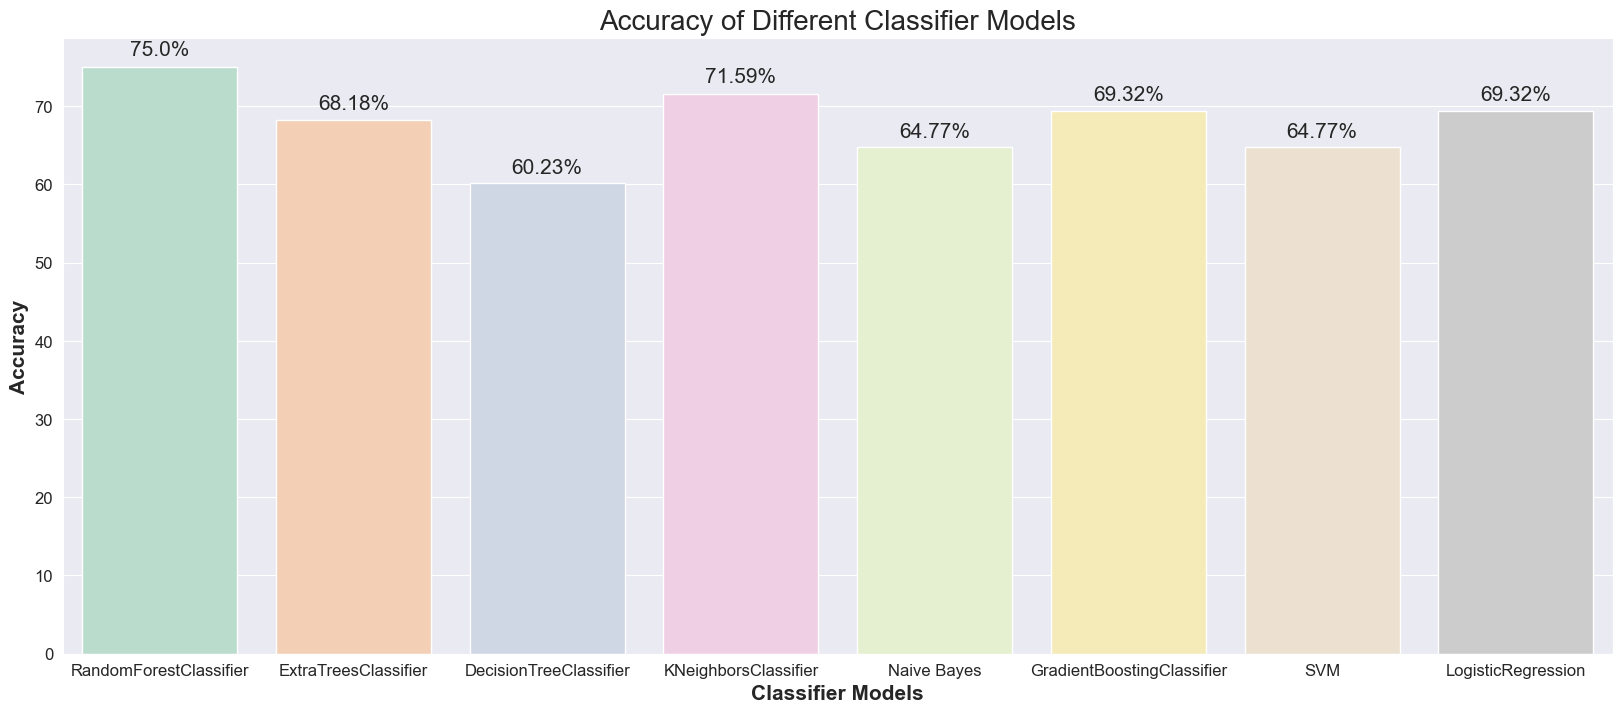

In [88]:
model_list = ['RandomForestClassifier', 'ExtraTreesClassifier','DecisionTreeClassifier','KNeighborsClassifier' ,
              'Naive Bayes', 'GradientBoostingClassifier', 'SVM', 'LogisticRegression']

plt.rcParams['figure.figsize'] = 20, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "Pastel2")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Accuracy of Different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

Sebelum menggunakan SMOTE model yang memiliki akurasi paling baik yaitu **RandomForest: 75%**, KNeighbors : 71,59%.

## 2. Akurasi sesudah menggunakan metode SMOTE

In [89]:
accuracy_list_smote

[81.81818181818183,
 85.9504132231405,
 81.81818181818183,
 66.94214876033058,
 73.55371900826447,
 78.51239669421489,
 63.63636363636363,
 71.900826446281]

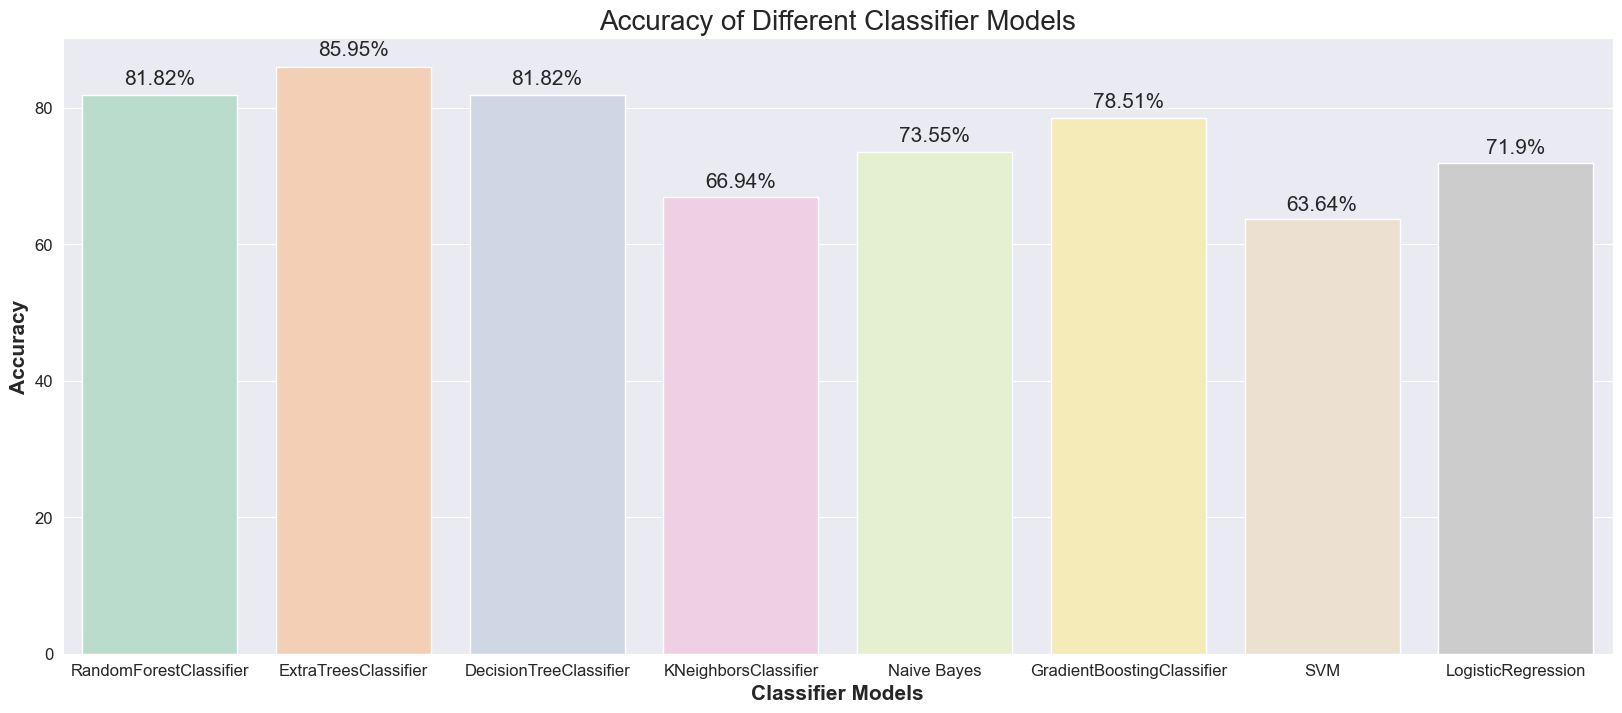

In [90]:
model_list = ['RandomForestClassifier', 'ExtraTreesClassifier','DecisionTreeClassifier','KNeighborsClassifier' ,
              'Naive Bayes', 'GradientBoostingClassifier', 'SVM', 'LogisticRegression']

plt.rcParams['figure.figsize'] = 20, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list_smote, palette = "Pastel2")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Accuracy of Different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

Sesudah menggunakan SMOTE model yang memiliki akurasi paling baik yaitu **ExtraTrees: 80,17%**, RandomForest : 78,51%.

## 3. Akurasi menggunakan Ensemble Model

In [91]:
accuracy_list_ensemble

[72.72727272727273, 73.86363636363636, 71.5909090909091]

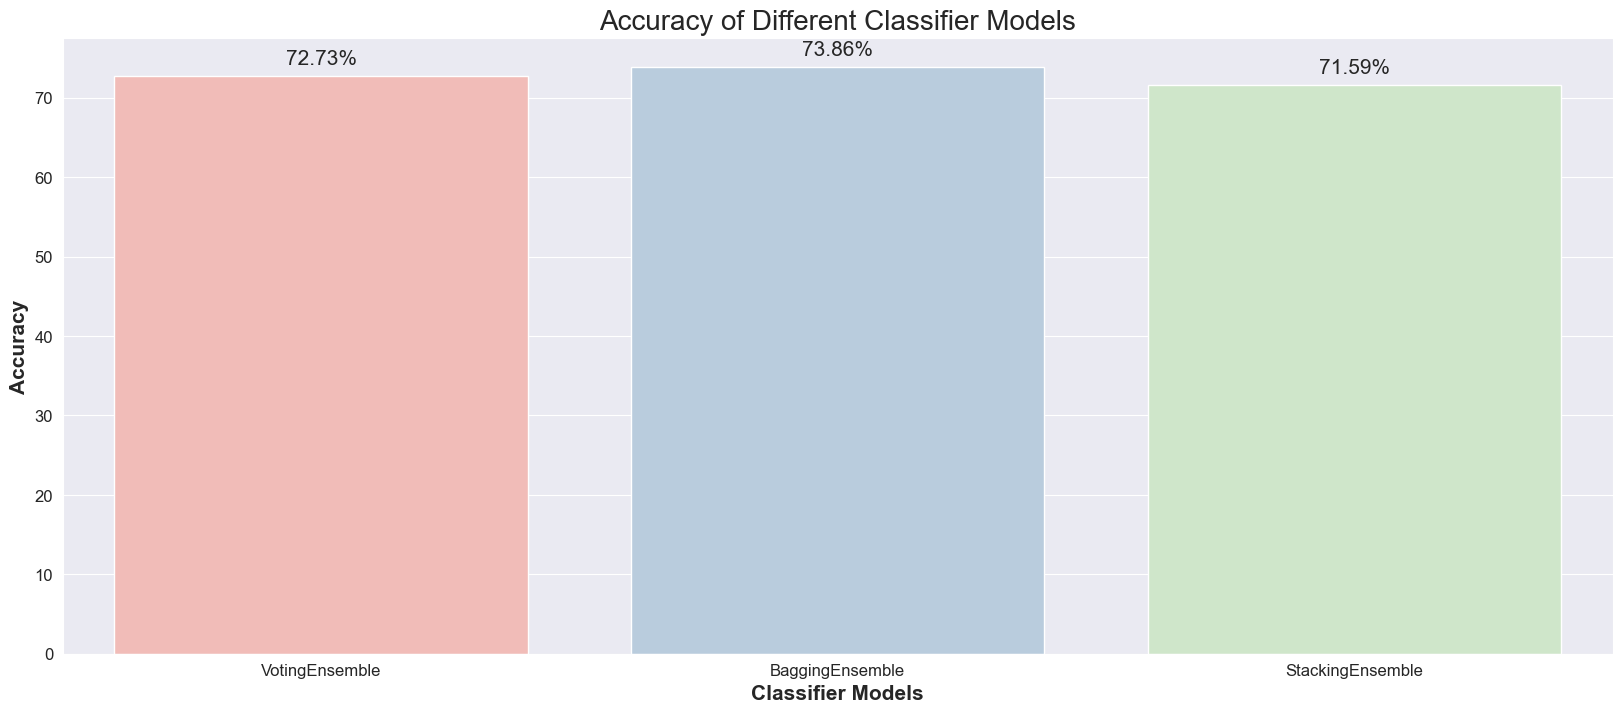

In [92]:
model_list = ['VotingEnsemble', 'BaggingEnsemble', 'StackingEnsemble']

plt.rcParams['figure.figsize'] = 20, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list_ensemble, palette = "Pastel1")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Accuracy of Different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

Menggunakan metode **Bagging Ensemble** model memiliki akurasi paling tinggi yaitu 73.86%

# __J. MODEL INFERENCE__
------

In [93]:
model_inference = {'ejection_franction':[20, 45, 38,60,40],
                   'serum_ceratinine':[2.1,0.8,1.6,1.9,1.1],
                   'age':[62, 55, 75, 90, 45],
                   'serum_sodium':[129, 130, 133,143,137],
                   'creatinine_phosphokinase' : [111,47,7861,61,1820],
                    'platelets' : [395000, 210000, 162000, 742000, 155000]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

,ejection_franction,serum_ceratinine,age,serum_sodium,creatinine_phosphokinase,platelets
0,20,2.1,62,129,111,395000
1,45,0.8,55,130,47,210000
2,38,1.6,75,133,7861,162000
3,60,1.9,90,143,61,742000
4,40,1.1,45,137,1820,155000


In [94]:
prediksi = ET_model.predict(model_inference)
prediksi

array([1, 0, 1, 0, 0], dtype=int64)

# K. Kesimpulan
1. Setelah dilakukan analisis korelasi dan Feature Selection dari 13 atribut diambil 6 atribut yang paling berpengaruh untuk train model. Atribut yang diambil yaitu **ejection_franction, serum_ceratinine, age, serum_sodium, ceratinine_phosphokinase dan platelets**
2. Melakukan pemodelan menggunakan **RandomForestClassifier, ExtraTreesClassifier, DecisionTreeClassifier, KNeighborsClassifier, Naive Bayes (Gaussian), GradientBoostingClassifier, SVM, dan LogisticRegression** untuk mengklasifikasi terjadinya pasien meninggal 
3. Karena hasilnya kurang optimal, dilakukan melakukan balancing data. Pada project ini, kami menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique).
4. Setelah setiap model dilakukan metode SMOTE didapat model dengan accuracy paling baik yaitu moel **ExtraTrees** dengan accuracy sebesar **80,17%**
5. Dan terakhir, membuat ensembel model (Voting, bagging dan stacking). Dari ketiga ensembel model ini metode **Bagging Ensemble** model memiliki akurasi paling tinggi yaitu 73.86% .

**Hal-hal yang berpengaruh pada hasil klasifikasi DEATH_EVENT (pasien meninggal) antara lain:**
1. Berdasarkan uji korelasi, **ejection_franction** memiliki nilai korelasi sebesar -0.28. Artinya, jika semakin kecil persentase darah yang meninggalkan jantung dalam setiap kontraksi jantung, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga. 
2. Berdasarkan uji korelasi, **serum_creatinine** memiliki nilai korelasi sebesar 0.28. Artinya, jika semakin besar serum kreatinine pada darah, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
3. Berdasarkan uji korelasi, **age** memiliki nilai korelasi sebesar 0.27. Artinya, jika semakin tua usia seorang pasien, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
4. Berdasarkan uji korelasi, **serum_sodium** memiliki nilai korelasi sebesar -0.18. Artinya, jika level serum sodium dalam darah pasien semakin sedikit, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
5. Berdasarkan uji korelasi, **creatinine_phosphokinase** memiliki nilai korelasi sebesar 0.07. Artinya, jika level enzim CPK pada tubuh pasien semakin banyak, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
6. Berdasarkan uji korelasi, **platelets** memiliki nilai korelasi sebesar -0.039. Artinya, jika jumlah platelet dalam darah pasien semakin sedikit, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.